In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

# Parametric tests

### One sample only

<font color='blue'>

We want to find the **mean** of an unknown distribution from which we have a sample.
    
$
\left\{
    \begin{array}{ll}
        \mathcal{H}_0: m=a \\
        \mathcal{H}_1: m>a \\
    \end{array}
\right.
$

Requirements/assumptions:
    
- we need to know the standard deviation of the population
    
Note: there is no assumption on the unknown distribution law (if the random variable is not Gaussian, we can use the CLT to have the normality).

</font>

*Example* (based on Saporta p.325)

Context: farmers suffer from the weather. A company proposes a new method to increase the chance of raining. We want to assess the efficiency of the method.

In [24]:
years = np.array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])
mm = np.array([510, 614, 780, 512, 501, 535, 603, 788, 650]) # millimeters of rain
df_report = pd.DataFrame(data=np.stack([years, mm], axis=1), columns=['years','mm'])
df_report

,years,mm
0,1951,510
1,1952,614
2,1953,780
3,1954,512
4,1955,501
5,1956,535
6,1957,603
7,1958,788
8,1959,650


We'll say that the method really improves the raining frequency if on average it increases by at least 50 mm. Hence, the test is:

$\mathcal{H}_0: m=600~mm$ => if we keep $\mathcal{H}_0$, it means the method didn't improve the raining level (since the current mean is already 600).

Assumption: the natural raining level follows a Gaussian law $X \sim \mathcal{N}(600,100)$

We thus perform a zscore test.

1) Find the test: see above

2) Find the estimator: we use the empiric mean: $\hat \beta = \frac{1}{n}\sum_{i=1}^{n}X_i$

3) Write the rejection region: $Z = \{\hat \beta \ge k\}$

In order to accept $\mathcal{H}_0$ we need $\mathbb{P}_{\mathcal{H}_0}(\hat \beta \geq k) = \alpha$ or $\mathbb{P}_{\mathcal{H}_0}(\hat \beta < k) = 1-\alpha$

4) Compute the test statistic

$T = \frac{\hat \beta - \mu_\beta}{\sigma_\beta} \sim \mathcal{N}(0,1)$

Note: we don't need $\sqrt{n}$ since the distribution of $X$ is already Gaussian.

5) Retrieve quantiles of known distributions

We know that $\sigma_\beta = 100$ and that, under $\mathcal{H}_0$, $\mu_\beta = 600$.

Hence $\mathbb{P}_{\mathcal{H}_0}(\hat \beta < k) = \mathbb{P}_{\mathcal{H}_0}(T < \frac{k-600}{100/3})$

We thus deduce the value of $k$: $\frac{k-600}{100/3}=q_{1-\alpha}$

=> $k = q_{1-\alpha} \frac{100}{3}+600$

Thanks to the quantile table: $k = 1.64 \frac{100}{3}+600 = 655$

Finally the reject region is $Z = \{\hat \beta \ge 655\}$

We now find the numerical value of $\hat \beta$:

In [28]:
np.mean(df_report['mm'])

610.3333333333334

Since $610<655$ we don't reject $\mathcal{H}_0$ and conclude that the method doesn't significatively improves the raining level.

<font color='red'>In this example we looked for the distribution from which the sample is extracted. Here we only knew the type of the distribution (Gaussian) and its standard deviation. The power of the test is that it takes into account the fact that we only have a **sample** from an unknown distribution. It thus considers the randomization process into the final decision.</font>

### Comparison of samples

Context: there are two universities. We want to know if students have the same size on average across the two universities.

Method: we don't have the sizes of all students so we only work with two samples. We will infer some conclusions for the total population.

*Total population*

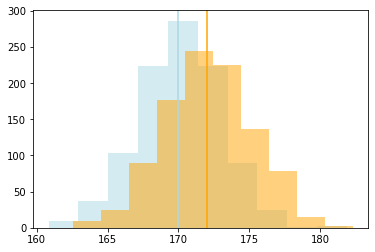

In [3]:
n = 1000

mu_1 = 170
sigma_1 = 3

mu_2 = 172
sigma_2 = 3

np.random.seed(1)

df_university = pd.DataFrame()

df_university['university_1'] = np.random.normal(mu_1, sigma_1, n)
df_university['university_2'] = np.random.normal(mu_2, sigma_2, n)

plt.hist(df_university['university_1'], alpha=0.5, color='lightblue')
plt.hist(df_university['university_2'], alpha=0.5, color='orange')
plt.axvline(mu_1, color='lightblue')
plt.axvline(mu_2, color='orange')
plt.show()

*Samples*

1.6321683818117847
2.6133873471759257


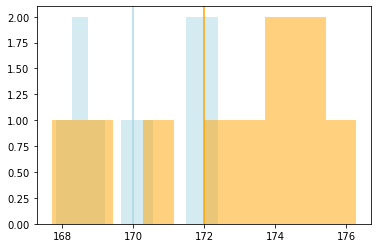

In [5]:
sample_1 = df_university['university_1'].sample(n=10, random_state=1)
print(np.std(sample_1))
sample_2 = df_university['university_2'].sample(n=10, random_state=1)
print(np.std(sample_2))

plt.hist(sample_1, alpha=0.5, color='lightblue')
plt.hist(sample_2, alpha=0.5, color='orange')
plt.axvline(mu_1, color='lightblue')
plt.axvline(mu_2, color='orange')
plt.show()

We note that the standard deviation from the two samples is different, although the ones from the total population is similar.

*T-test*

t-test assumes sample variances are equal

$\mathcal{H}_0: m_1=m_2$

In [6]:
ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=-2.6165225507365517, pvalue=0.01748092770802271)

pvalue < 5% => we reject $\mathcal{H}_0$ without taking too much risk => the two samples have significantly different means; since the test takes into account the randomization of the sampling, we deduce **the two universities have significantly different means**.

pvalue > 5% => we don't reject $\mathcal{H}_0$ without taking too much risk => the two samples don't have significantly different means; since the test takes into account the randomization of the sampling, we deduce **the two universities have the same means**.